<a href="https://colab.research.google.com/github/aravind309/Tensorflow-AI/blob/master/CNN_FMNIST_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [4]:
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print(logs)
    if (logs.get('loss')<0.25):
      print("\n Cancelling training because loss is low")
      self.model.stop_training = True

In [7]:
callback = myCallback()
model.compile(optimizer="adam",loss ="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(training_images, training_labels,epochs=5,validation_data=(test_images, test_labels),callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.6122 - accuracy: 0.7790 - val_loss: 0.3366 - val_accuracy: 0.8804
{'loss': 0.4410949945449829, 'accuracy': 0.839733362197876, 'val_loss': 0.3366246223449707, 'val_accuracy': 0.8804000020027161}
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2980 - accuracy: 0.8919 - val_loss: 0.2876 - val_accuracy: 0.8948
{'loss': 0.2915399670600891, 'accuracy': 0.8932499885559082, 'val_loss': 0.287596732378006, 'val_accuracy': 0.8948000073432922}
Epoch 3/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2498 - accuracy: 0.9074 - val_loss: 0.2741 - val_accuracy: 0.9025
{'loss': 0.2475394457578659, 'accuracy': 0.9088333249092102, 'val_loss': 0.27409201860427856, 'val_accuracy': 0.9024999737739563}

 Cancelling training because loss is low


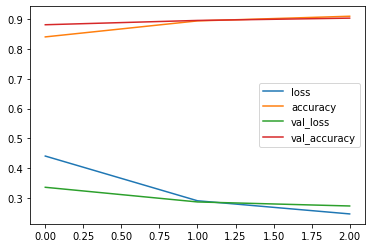

In [8]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [9]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2741 - accuracy: 0.9025


[0.27409201860427856, 0.9024999737739563]